In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

# 1. Set rcParams

In [256]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['axes.linewidth'] = 0.5

plt.rcParams["figure.dpi"] = 300

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# 2. Set up grid

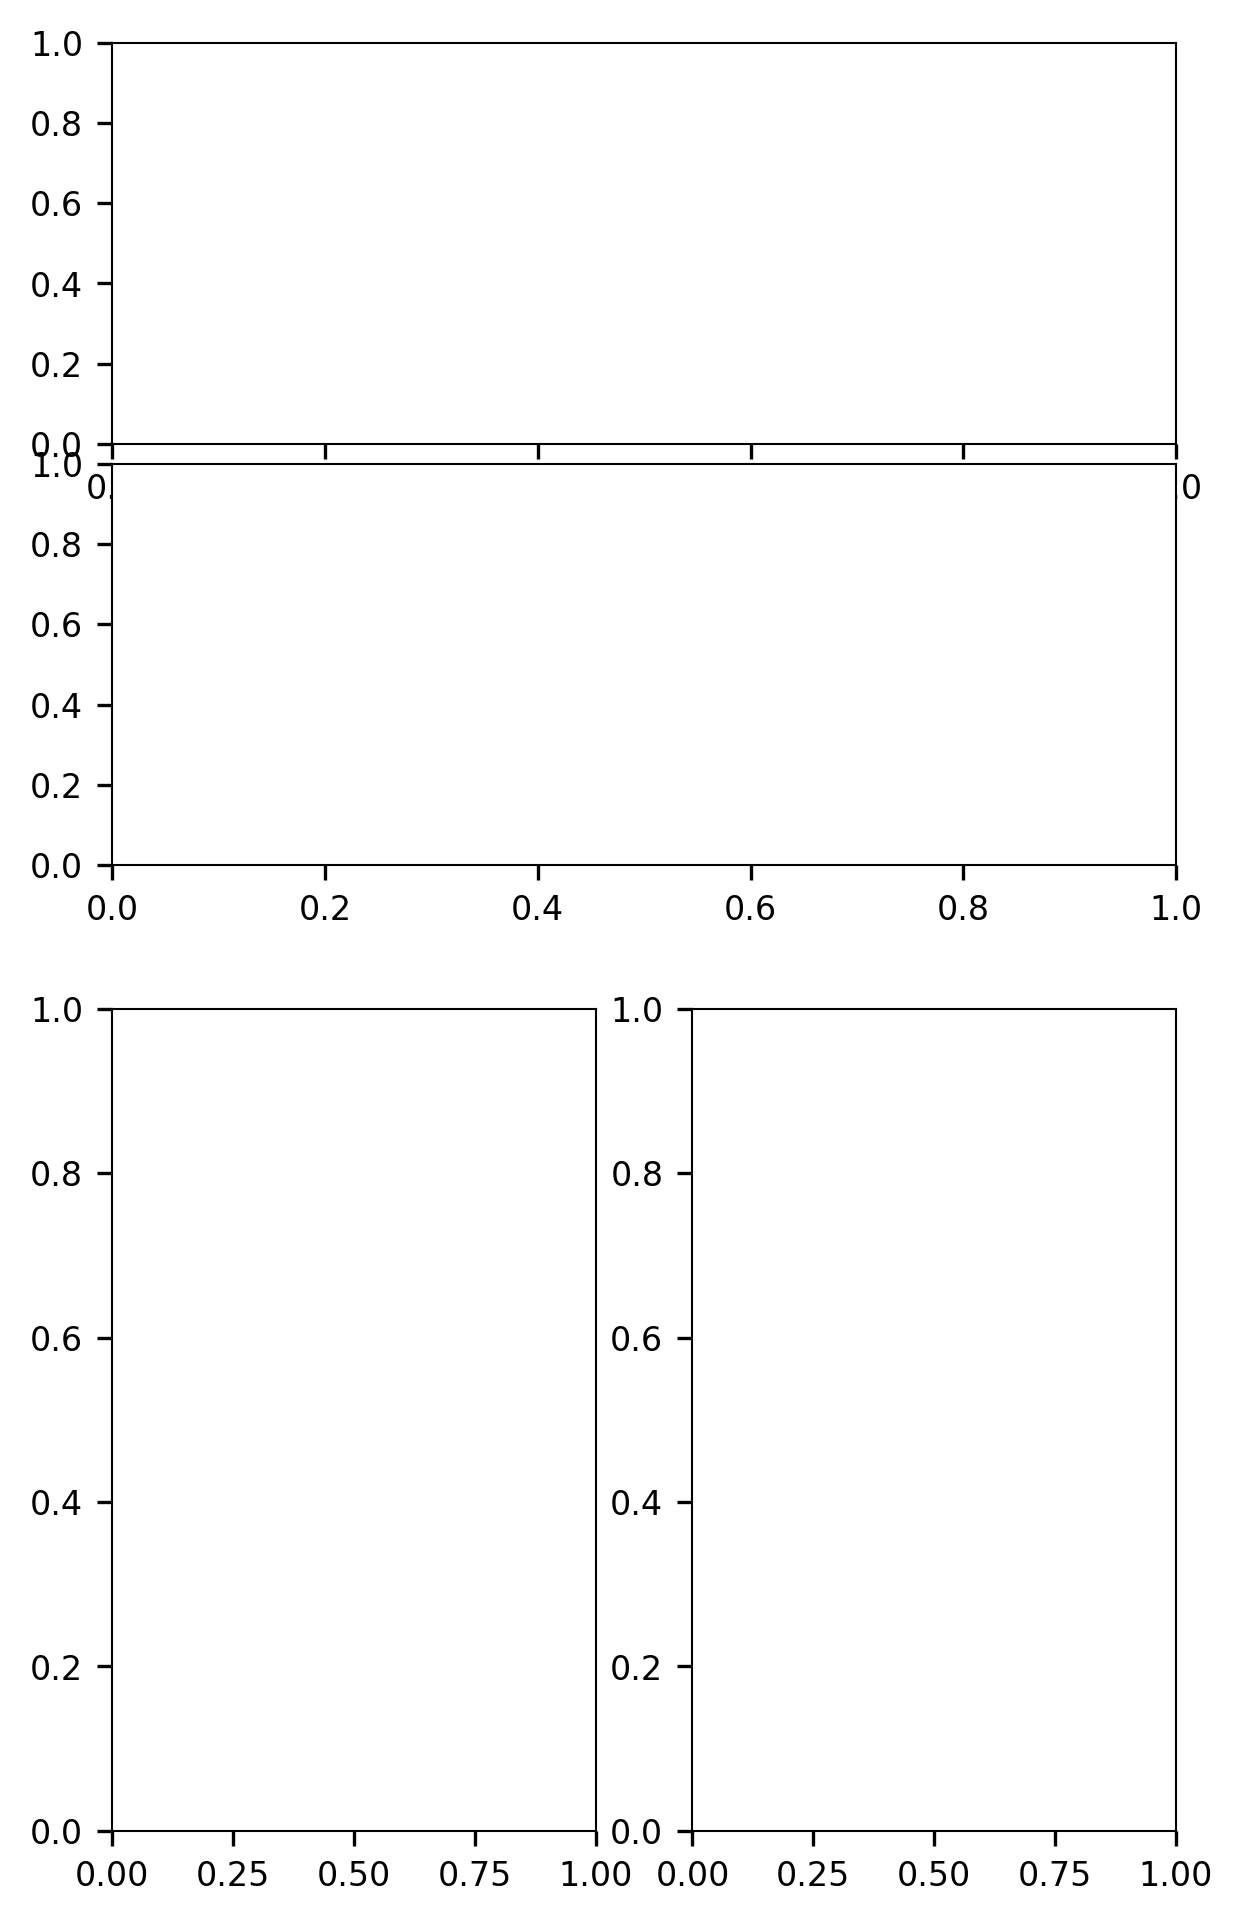

In [292]:
width = 114 / 25.4
height = 174 / 25.4
fig4 = plt.figure(constrained_layout=False, figsize=(width, height))
gs1 = fig4.add_gridspec(2, 2, left=0.16, right=0.95, top=0.95, bottom=0.55, hspace=0.05)
gs2 = fig4.add_gridspec(1, 2, left=0.16, right=0.95, top=0.48, bottom=0.08)

f4_ax1 = fig4.add_subplot(gs1[0, :])
f4_ax2 = fig4.add_subplot(gs1[1, :])
f4_ax3 = fig4.add_subplot(gs2[0, 0])
f4_ax4 = fig4.add_subplot(gs2[0, 1])


# Read in necessary data

In [293]:
# All residual values
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Client masks
client_mask = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_client_mask = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_client_mask = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_client_mask = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

# A. Windowed average

In [294]:
# Calculate moving average of client scores
def moving_average(a, n=10) :
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

pos_resid_ave = resid_map.mean(axis=1, skipna=True).values
windowed_resids = moving_average(pos_resid_ave)

f4_ax1.plot(np.linspace(270, 520, num=len(windowed_resids)), windowed_resids, c='k')
f4_ax1.set_ylabel('Average client\nscore')
f4_ax1.spines['top'].set_visible(False)
f4_ax1.spines['right'].set_visible(False)

# Delete tick labels
f4_ax1.get_xaxis().set_ticks([])

[]

# B. Inhibited vs dependent clients by position

In [295]:
# Get number of inhibited and dependent
num_dep = np.sum(dep_client_mask * 1, axis=1)
num_ihb = np.sum(ihb_client_mask * 1, axis=1)
num_mut = np.sum(~np.isnan(resid_map.values), axis=1)

# Calculate percentage
perc_dep = 100 * (num_dep / num_mut)
perc_ihb = 100 * (num_ihb / num_mut)

cmap = matplotlib.cm.get_cmap('bwr')
dep = cmap(0.3)
ihb = cmap(0.8)

pos_arr = np.arange(270, 520)
f4_ax2.bar(pos_arr, perc_dep, color=dep, label='Dependent clients')
f4_ax2.bar(pos_arr, perc_ihb, color=ihb, bottom=perc_dep, label='Inhibited clients')
f4_ax2.set_xlabel('Position')
f4_ax2.set_ylabel('Percent client\nvariants')
f4_ax2.legend(loc=2)
f4_ax2.spines['top'].set_visible(False)
f4_ax2.spines['right'].set_visible(False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


# D. Difference from median score

In [296]:
# Types of mutants in clients
client_med_aa = np.nanmedian(resid_map.values, axis=0)

# Dictionary for ticks
inv_aa_idx_dict = {v: k for k, v in src_utils.__aa_idx_dict__.items()}

# Set tick labels and locations
y_pos = list(inv_aa_idx_dict.keys())
tick_labels = inv_aa_idx_dict.values()

# Plot bars
f4_ax3.barh(y_pos[:-1], client_med_aa[:-1], align='center', color='lightgrey')
f4_ax3.axvline(0, c='k')

# Relabel ticks
f4_ax3.set_yticks(y_pos[:-1])
f4_ax3.set_yticklabels(list(tick_labels)[:-1])
f4_ax3.set_xticks([-0.046, 0, 0.046])
f4_ax3.set_xticklabels([-0.03, 0, 0.03])
f4_ax3.invert_yaxis()  # labels read top-to-bottom

# Label axes
f4_ax3.set_xlabel('Median effect')
f4_ax3.set_ylabel('Amino acid')

Text(13.333333333333318, 0.5, 'Amino acid')

In [297]:
# Plot percent of amino acid mutations that are clients
num_muts = np.sum(~np.isnan(resid_map.values), axis=0)
num_dep = np.sum(dep_client_mask * 1, axis=0)
num_ihb = np.sum(ihb_client_mask * 1, axis=0)

perc_dep = 100 * (num_dep / num_muts)
perc_ihb = 100 * (num_ihb / num_muts)

# set height of bar
diff = perc_ihb - perc_dep

# Set color
color_bars = []
for val in diff:
    if val > 0:
        color_bars.append(ihb)
    else:
        color_bars.append(dep)

# Plot bars
f4_ax4.barh(y_pos[:-1], diff[:-1], align='center', color=color_bars)
f4_ax4.axvline(0, c='k')
 

# Relabel ticks
f4_ax4.set_yticks(y_pos[:-1])
f4_ax4.set_yticklabels(list(tick_labels)[:-1])
f4_ax4.invert_yaxis()  # labels read top-to-bottom

f4_ax4.set_xlim([-9, 9])

# Label axes
f4_ax4.set_xlabel('Percent inhibited-\nPercent dependent') 


Text(0.5, 13.333333333333304, 'Percent inhibited-\nPercent dependent')

In [298]:
fig4.savefig('../../Figures/manuscript_figs/fig4_drafts/f4_v2.png')